### OWlViT - Multimodal Object Detection (OWL-ViT)

![Multimodal Object Detection with OWL-ViT](../assets/multi_modal_object_detection.png)


Target sizes: (height, width)  tensor([[480., 640.]])
Detected remote control with confidence 0.328 at location [40.03, 72.43, 177.76, 115.58]
Detected remote control with confidence 0.159 at location [335.71, 74.17, 371.88, 187.55]
Detected a photo of a cat with confidence 0.707 at location [324.97, 20.44, 640.58, 373.29]
Detected a photo of a cat with confidence 0.717 at location [1.46, 55.26, 315.55, 472.17]
Detected cat tail with confidence 0.121 at location [142.39, 285.1, 219.42, 344.96]


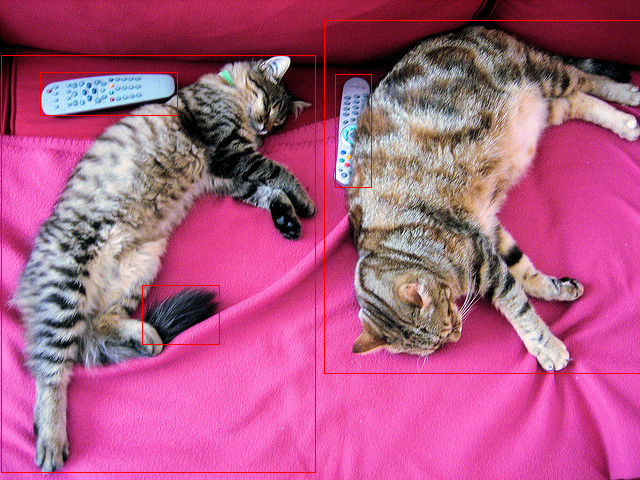

In [3]:
import requests
from PIL import Image, ImageDraw
import torch
from transformers import OwlViTProcessor, OwlViTForObjectDetection

processor = OwlViTProcessor.from_pretrained("google/owlvit-base-patch32")
model = OwlViTForObjectDetection.from_pretrained("google/owlvit-base-patch32")

url = "http://images.cocodataset.org/val2017/000000039769.jpg"
image = Image.open(requests.get(url, stream=True).raw)
texts = [["a photo of a cat", "a photo of a dog", "remote control", "cat tail"]]
inputs = processor(text=texts, images=image, return_tensors="pt")
outputs = model(**inputs)

target_sizes = torch.Tensor([image.size[::-1]])
results = processor.post_process_object_detection(
    outputs=outputs, target_sizes=target_sizes, threshold=0.1
)
i = 0  # Retrieve predictions for the first image for the corresponding text queries
text = texts[i]
boxes, scores, labels = results[i]["boxes"], results[i]["scores"], results[i]["labels"]

# Create a draw object
draw = ImageDraw.Draw(image)
print('Target sizes: (height, width) ', target_sizes)

# Draw each bounding box
for box, score, label in zip(boxes, scores, labels):
    box = [round(i, 2) for i in box.tolist()]
    print(
        f"Detected {text[label]} with confidence {round(score.item(), 3)} at location {box}"
    )
    # Draw the bounding box on the image
    draw.rectangle(box, outline="red")

# Display the image
image